In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

label = LabelEncoder()


Using TensorFlow backend.


##### Data loading and Preparation

In [2]:
train_df = pd.read_csv("Train.csv")
#make a copy
train_df_cp=train_df

In [3]:
train_df.shape

(7736, 21)

In [4]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [5]:
train_df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

In [6]:
#First lets look at the data in the columns of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 21 columns):
ID                   7736 non-null object
gender               7736 non-null object
age                  7736 non-null int64
race                 7736 non-null object
dwelling             7736 non-null object
dwelling_type        7736 non-null object
province_code        7736 non-null object
metro_code           7736 non-null object
psu                  7736 non-null int64
nationality          7736 non-null object
RTH                  7736 non-null object
marital_st           7736 non-null object
Lang_inside          7736 non-null object
Lang_outside         7736 non-null object
Education            7736 non-null object
lw_work              7736 non-null object
lw_business          7736 non-null object
help_on_household    7736 non-null object
job_or_business      7736 non-null object
nature_of_work       7736 non-null object
target               7736 non-null int64
dtypes: int64(

We dont seem to have any columns without values, so we're good to go. 

In [7]:
#Check for mising values
train_df.isnull().any()

ID                   False
gender               False
age                  False
race                 False
dwelling             False
dwelling_type        False
province_code        False
metro_code           False
psu                  False
nationality          False
RTH                  False
marital_st           False
Lang_inside          False
Lang_outside         False
Education            False
lw_work              False
lw_business          False
help_on_household    False
job_or_business      False
nature_of_work       False
target               False
dtype: bool

No missing values as well. Yaay.

#### Data Visualisation

To begin data visualization, lets look at the target variables, then identify the categorical features and numerical features.

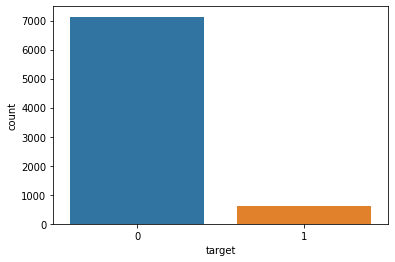

In [8]:
sns.countplot(train_df["target"])

We can see that there are more 0's than 1's. This shows an imbalance in the dataset. We might have to address that. 

# # Categorical Features.

In [9]:
train_df = train_df.drop('ID', axis=1)# feature columns

In [10]:

cat_features = train_df.dtypes[train_df.dtypes == 'object'].index
print('Categorical features', len(cat_features))

print("Categorical features", train_df[cat_features].columns)

Categorical features 17
Categorical features Index(['gender', 'race', 'dwelling', 'dwelling_type', 'province_code',
       'metro_code', 'nationality', 'RTH', 'marital_st', 'Lang_inside',
       'Lang_outside', 'Education', 'lw_work', 'lw_business',
       'help_on_household', 'job_or_business', 'nature_of_work'],
      dtype='object')


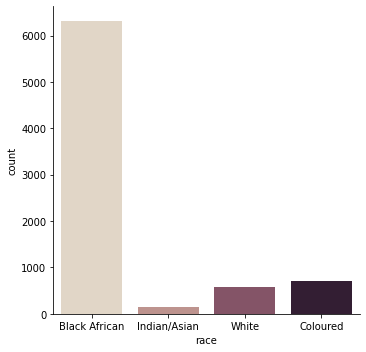

In [11]:
sns.catplot(x='race', kind="count", palette="ch:.25", data=train_df);

Our dataset has more more people of Black African descent than any other race.

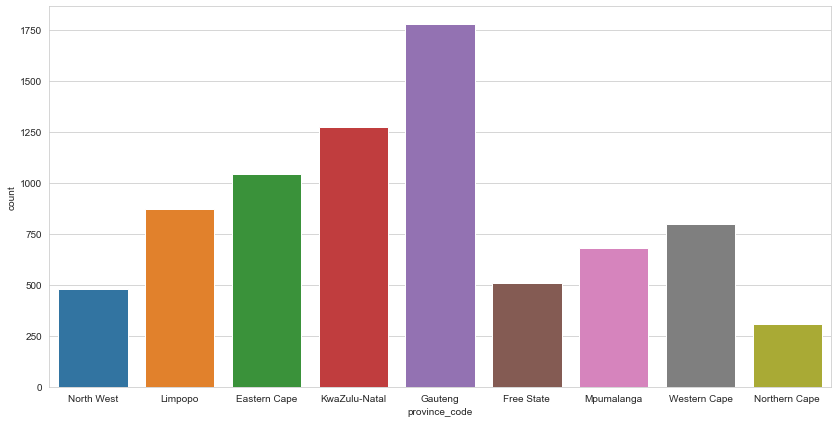

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(train_df['province_code'])

Most respondents wee from the GAuteg province as opposed to other provinces

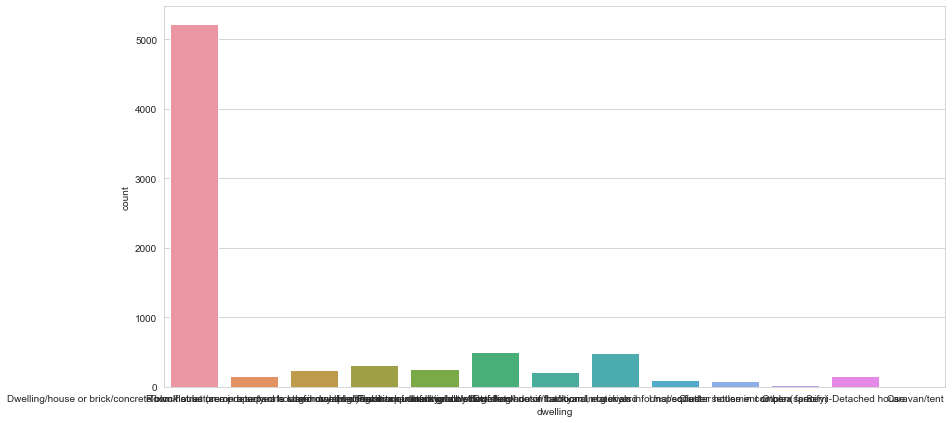

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(train_df['dwelling'])

# # Numerical Features

In [14]:
num_features = train_df.dtypes[train_df.dtypes != 'object'].index
print('Numerical features', len(num_features))
print("Numerical features", train_df[num_features].columns)

Numerical features 3
Numerical features Index(['age', 'psu', 'target'], dtype='object')


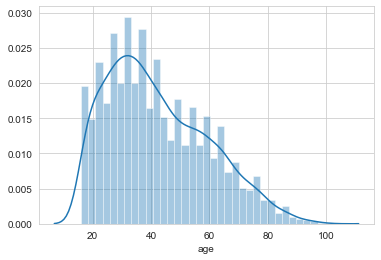

In [15]:
sns.distplot(train_df["age"])

- Try to create more visualisation from the other columns, what is the level of education of individual in the dataset.
- What about coorelation of other columns to the target.

It look like we have more respondents in the ages of 30 -40.

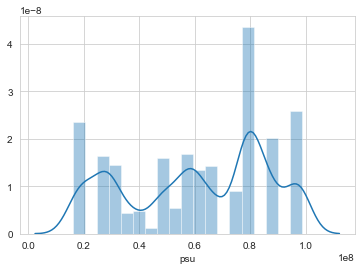

In [16]:
sns.distplot(train_df["psu"])

##### Handling Categorical columns
- There are various way of encoding categorical columns. In the case below we're using label encoding 
<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html>.
- Find out other ways of encoding categorical columns, like one hot encoding - which one works better on this case.

In [17]:
#train_df['gender'] = label.fit_transform(train_df['gender'])
#train_df['race'] = label.fit_transform(train_df['race'])
#train_df['dwelling'] = label.fit_transform(train_df['dwelling'])
#train_df['dwelling_type'] = label.fit_transform(train_df['dwelling_type'])
#train_df['province_code'] = label.fit_transform(train_df['province_code'])
#train_df['metro_code'] = label.fit_transform(train_df['metro_code'])
#train_df['nationality'] = label.fit_transform(train_df['nationality'])
#train_df['RTH'] = label.fit_transform(train_df['RTH'])
#train_df['marital_st'] = label.fit_transform(train_df['marital_st'])
#train_df['Lang_inside'] = label.fit_transform(train_df['Lang_inside'])
#train_df['Lang_outside'] = label.fit_transform(train_df['Lang_outside'])
#train_df['Education'] = label.fit_transform(train_df['Education'])
#train_df['lw_work'] = label.fit_transform(train_df['lw_work'])
#train_df['lw_business'] = label.fit_transform(train_df['lw_business'])
#train_df['help_on_household'] = label.fit_transform(train_df['help_on_household'])
#train_df['job_or_business'] = label.fit_transform(train_df['job_or_business'])
#train_df['nature_of_work'] = label.fit_transform(train_df['nature_of_work'])



In [18]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[cat_features]))


# One-hot encoding removed index; put it back
OH_cols_train.index = train_df.index


# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df.drop(cat_features, axis=1)


# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

OH_X_train = pd.DataFrame(OH_X_train)
OH_X_train.head(10)
train_set = OH_X_train

In [19]:
train_df.RTH.unique()

array(['Son/daughter/stepchild/adopted child of person 01',
       'Other relative (e.g. in-laws or aunt/uncle) of person 01',
       'Father/mother/stepfather/stepmother of person 01',
       'Head/acting head', 'Husband/wife/partner of person 01',
       'Brother/sister/stepbrother/stepsister of person 01',
       'Grandchild/great grandchild of person 01', 'Non-related persons',
       'Grandparent/great grandparent of person 01', 'Unspecified'],
      dtype=object)

In [20]:
train_df.psu.max()

98710543

In [21]:
y_train_set = train_set["target"] # the label/target column
X_train_set = train_set.drop('target', axis=1)# feature columns


#### Apply SMOTE
 This is to address the imbalance

#### SMOTE

In [22]:
smt = SMOTE()
X_train_set, y_train_set = smt.fit_sample(X_train_set, y_train_set)
#y_train.value_counts()

In [23]:

#PCA
pca = PCA(n_components=7)
train_df_up=pca.fit_transform(X_train_set)
#x_test=pca.fit_transform(x_test)
train_df_updated =pd.DataFrame(train_df_up)



#### Spliting the data
- It's always advisable to set aside some data for validating how your model performs. They are various methods of cross validation. In this case we use train-test split module from sklearn.

- Try other methods of cross-validation, Kfold, Stratified Fold, etc.

In [24]:
# spliting the data, 70% train set and 30% val set
#train_set, val_set = train_test_split(train_df,
                           #    test_size=0.30, random_state=2)
#train_set, val_set = train_test_split(train_df_updated,
                             # test_size=0.30, random_state=2)
    
X_train, X_valid, y_train, y_valid = train_test_split(train_df_updated, y_train_set,
                                                     test_size=0.3,
                                                      random_state=2)


In [25]:
#train_df.age.max()

In [26]:
#train_set.shape

In [27]:
#val_set.shape

In [28]:
#train_set.head(5)

##### Model
- Create a binary classifier model for training purposes.
- Using simple RandomForest Classifier

In [29]:
#cls = RandomForestClassifier()
#from sklearn.ensemble import AdaBoostClassifier
#cls = AdaBoostClassifier(random_state=3)

from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier(learning_rate=0.5,n_estimators=150, random_state=60, max_depth = 5)

#import xgboost as xgb
#cls =xgb.XGBClassifier(random_state=1,learning_rate=0.01)

#cls4 = RandomForestClassifier()

#eclf1 = VotingClassifier(estimators=[
      # ('ada', cls1), ('gb', cls2), ('xg', cls3), ('rf',cls4)], voting='hard')

#eclf1 = eclf1.fit(X_train, y_train)



cls.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=60, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
# export to 
import sklearn.externals
import joblib

joblib.dump(cls, 'model.joblib')

['model.joblib']

###### 1. validation set
- let's see how our classifier performs on the validation dataset

In [31]:
#X_val_set = val_set.drop(["target", "ID"], axis=1)
#y_val_set = val_set["target"]

In [32]:
y_pred = cls.predict(X_valid)

###### 2. Error metric
 - f1 score is the error metric for this competition.
 - **f1 score** -  

In [33]:
f1_score(y_valid, y_pred)

0.8681745487777016

-We have an **f1 score of 0.0294**. Think of other ways to improve the scores like;
         
  - generate more features
  - drop the column that are least important, like gender in this case since we're only dealing with female crime data
  - try different classifier models, e.g k-Nearest Neighbor(KNN) classifier, Support Vector Machines, catboost classifier etc

#### Submission

- generating a sumission file 

###### 1. load the test data

- Do the same preprocessing performed on the training data

In [34]:
test_df = pd.read_csv("Test.csv")
test_df_copy=test_df
#test_ID=test_df["ID"]
test_ = test_df.drop(["ID"], axis=1)
test_.head(5)

,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,Head/acting head,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent
1,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,Head/acting head,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
2,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable
3,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
4,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,Head/acting head,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable


In [35]:


# preprocessing
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_[cat_features]))

#OH_cols_test = pd.DataFrame(OH_encoder.transform(label_X_test[cat_features]))

# One-hot encoding removed index; put it back
OH_cols_test.index = test_.index
#OH_cols_valid.index = label_X_valid.index
#OH_cols_test.index = label_X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_test = test_.drop(cat_features, axis=1)
#num_X_valid = label_X_valid.drop(cat_onehot, axis=1)
#num_X_test = label_X_test.drop(cat_onehot, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
#OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
#OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_test = pd.DataFrame(OH_X_test)
OH_X_test.head(10)
test_transform = OH_X_test

In [36]:
test_transform.head()

,age,psu,0,1,2,3,4,5,6,7,...,139,140,141,142,143,144,145,146,147,148
0,23,36410104,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,64,97410477,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18,26011572,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,19,87710674,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,87411106,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
#PCA
pca = PCA(n_components=7)
test_set_pca=pca.fit_transform(test_transform)
#x_test=pca.fit_transform(x_test)
test_df_up =pd.DataFrame(test_set_pca)


In [38]:
### predict on the test data

test_predictions = cls.predict(test_df_up)
submission_df = pd.DataFrame()
submission_df["ID"] = test_df_copy["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission.csv", index=False)